In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import time
from scipy import stats

In [2]:
#link='https://codeforces.com/api/contest.list?gym=false'
#data = pd.read_json(link)
#if data['status'][0]=='OK':
#     con = pd.DataFrame.from_records(data['result'])
#con

In [3]:
 #link='https://codeforces.com/api/contest.ratingChanges?contestId=1601'
 #data = pd.read_json(link)
 #if data['status'][0]=='OK':
 #      dfAll = pd.DataFrame.from_records(data['result'])


In [4]:
#for j in con['id']: 
#    i=0
#    while i<3:
#        try:
#            time.sleep(0.2)
#            link='https://codeforces.com/api/contest.ratingChanges?contestId=' + str(j)
#            data = pd.read_json(link)
#            if data['status'][0]=='OK':
#                df = pd.DataFrame.from_records(data['result'])
#                dfAll=pd.concat([dfAll,df],ignore_index=True)
#                i=i+5
#                print(j) + "****"
#        except (BaseException) as e:    
#                time.sleep(1)
#                i=i+1
#                #ratedListAll[ratedListAll['handle']==j][0]
#                if i==3:
#                    print(j)
#                    print(e)
#dfAll

In [5]:
#dfAll.to_csv('cfChangeRating2021_10_28.csv')

In [6]:
dfAll= pd.read_csv('cfChangeRating2021_10_28.csv')

In [7]:
dfAll.drop_duplicates(keep='last',subset=['handle','contestId'],inplace=True)
dfAll

,Unnamed: 0,contestId,contestName,handle,rank,ratingUpdateTimeSeconds,oldRating,newRating
671,671,1601,Codeforces Round #751 (Div. 1),djq_cpp,1,1635150900,3014,3227
672,672,1601,Codeforces Round #751 (Div. 1),ksun48,2,1635150900,3547,3575
673,673,1601,Codeforces Round #751 (Div. 1),maroonrk,3,1635150900,3361,3406
674,674,1601,Codeforces Round #751 (Div. 1),ko_osaga,4,1635150900,3102,3192
675,675,1601,Codeforces Round #751 (Div. 1),Radewoosh,5,1635150900,3627,3562
...,...,...,...,...,...,...,...,...
4553069,4553069,1,Codeforces Beta Round #1,amirbehshad,57,1266588000,1500,1441
4553070,4553070,1,Codeforces Beta Round #1,Barnicle,57,1266588000,1500,1441
4553071,4553071,1,Codeforces Beta Round #1,oskirych,57,1266588000,1500,1441
4553072,4553072,1,Codeforces Beta Round #1,Remstam,57,1266588000,1500,1441


In [8]:
delta=pd.DataFrame(dfAll.groupby('handle')['ratingUpdateTimeSeconds'].apply(list))
delta.head()

,ratingUpdateTimeSeconds
handle,
---,"[1588352700, 1587918900, 1571936700, 155767890..."
----,"[1348507800, 1348076700, 1347816600]"
-----,"[1365355800, 1322240400, 1320865200, 131973480..."
---------,"[1603019100, 1602414300, 1593882900, 152692110..."
----------,"[1568475300, 1566751200, 1566143700, 156450450..."


In [9]:
delta['diff']=delta['ratingUpdateTimeSeconds'].apply(np.diff)

In [10]:
delta['diffD']=delta['diff']//(-24*60*60)

In [11]:
delta['len']=delta['diffD'].apply(len)

In [12]:
active=delta[delta['len']>0]

In [13]:
active['max']=active['diffD'].apply(np.max)

C:\Users\papa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
active['id']=active['diffD'].apply(np.argmax)

C:\Users\papa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
active.head()

,ratingUpdateTimeSeconds,diff,diffD,len,max,id
handle,,,,,,
---,"[1588352700, 1587918900, 1571936700, 155767890...","[-433800, -15982200, -14257800, -2070000, -105...","[5, 184, 165, 23, 12, 6, 35, 6, 9, 3, 14, 6, 7...",34,562,30
----,"[1348507800, 1348076700, 1347816600]","[-431100, -260100]","[4, 3]",2,4,0
-----,"[1365355800, 1322240400, 1320865200, 131973480...","[-43115400, -1375200, -1130400, -797400, -9306...","[499, 15, 13, 9, 10, 29, 16, 68, 180]",9,499,0
---------,"[1603019100, 1602414300, 1593882900, 152692110...","[-604800, -8531400, -66961800, -605400, -51660...","[7, 98, 775, 7, 5, 8, 1, 11, 9, 14, 14, 23, 15...",14,775,2
----------,"[1568475300, 1566751200, 1566143700, 156450450...","[-1724100, -607500, -1639200, -858600, -696600...","[19, 7, 18, 9, 8, 6, 28, 5, 5, 14, 7, 5, 29, 2...",116,70,115


In [16]:
#try:  
#    data = pd.read_json("https://codeforces.com/api/user.ratedList?activeOnly=false")
#    ratedListAll = pd.DataFrame.from_records(data['result'])
#    ratedListAll
#except (BaseException) as e:    
#    print(e)
#    print(alink)

In [17]:
#ratedListAll.to_csv('ratedList2021_11_01.csv')

In [18]:
ratedListAll=pd.read_csv('ratedList2021_11_01.csv')

C:\Users\papa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
ratedListAll.shape

(381139, 20)

In [48]:
res = pd.merge(ratedListAll, active, how="inner", on=["handle"])

In [49]:
res=res[['handle','rating','maxRating','diffD','len','max','id']]
res.head()

,handle,rating,maxRating,diffD,len,max,id
0,tourist,3804,3822,"[14, 28, 6, 3, 26, 11, 14, 6, 21, 9, 7, 13, 21...",204,167,81
1,Retired_MiFaFaOvO,3681,3681,"[8, 65, 11, 17, 11, 6, 3, 23, 4, 4, 10, 9, 189...",109,355,102
2,Benq,3618,3797,"[14, 34, 3, 4, 6, 27, 20, 21, 9, 7, 13, 13, 41...",123,85,118
3,Miracle03,3460,3587,"[14, 28, 14, 33, 14, 57, 21, 2, 40, 88, 7, 112...",33,139,16
4,ecnerwala,3452,3668,"[5, 29, 7, 6, 15, 11, 14, 36, 7, 13, 13, 8, 12...",125,581,85


In [22]:
res.describe()

,rating,maxRating,len,max,id
count,283412.000000,283412.000000,283412.000000,283412.000000,283412.000000
mean,1278.682286,1404.708326,14.722531,188.432882,5.876074
std,369.643098,354.904167,22.688602,280.529872,14.135563
min,-47.000000,422.000000,1.000000,0.000000,0.000000
25%,1036.000000,1363.000000,2.000000,29.000000,0.000000
50%,1272.000000,1412.000000,6.000000,95.000000,1.000000
75%,1479.000000,1564.000000,17.000000,228.000000,5.000000
max,3804.000000,3822.000000,740.000000,4048.000000,585.000000


In [23]:
d=pd.DataFrame(np.concatenate(res['diffD']))

In [24]:
d.describe()

,0
count,4.172542e+06
mean,2.757269e+01
std,9.191896e+01
min,0.000000e+00
25%,3.000000e+00
50%,7.000000e+00
75%,1.700000e+01
max,4.048000e+03


In [25]:
np.percentile(d,[95])

array([113.])

In [26]:
stats.percentileofscore(d[0], 183)

97.0886452431156

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x430A8290>]],
      dtype=object)

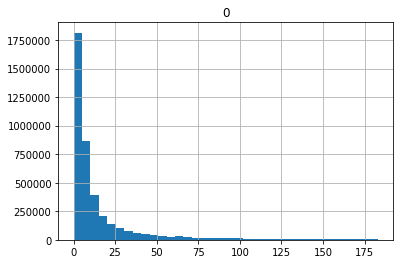

In [55]:
d[d<184].hist(bins=36)

In [61]:
sum(res['max']>183)

88148

In [66]:
sum((res['max']>=365))

38772

In [68]:
s=0
for i in range(1,13):
    b=i*365+i//4-1
    e=(i+1)*365+(i+1)//4
    k=sum((res['max']>b) & (res['max']<e))
    s=s+k
    print(b+1,e-1,k)
print(s)

365 729 25725
730 1094 7674
1095 1460 2850
1461 1825 1282
1826 2190 623
2191 2555 333
2556 2921 182
2922 3286 70
3287 3651 24
3652 4016 7
4017 4382 2
4383 4747 0
38772


In [44]:
res.sort_values('max',ascending=False ).head(40)

,handle,rating,maxRating,diffD,len,max,id
61940,ciprianf,1524,1592,"[4048, 39]",2,4048,0
35875,Fed,1686,1686,"[63, 7, 4019, 5]",4,4019,2
168581,Danthony,1205,1480,"[195, 23, 3941]",3,3941,2
60518,ixrs,1532,1568,[3921],1,3921,0
177002,rafaeljack3,1178,1393,"[3878, 14]",2,3878,0
104269,glebsmag,1360,1411,[3751],1,3751,0
90918,HumbertoBarbosa,1402,1625,"[3720, 126, 134, 38, 36]",5,3720,0
20921,Lynncui,1836,1943,"[25, 4, 4, 9, 8, 1, 8, 16, 9, 2, 2, 1, 5, 2, 3...",22,3719,19
24181,yiuyuho,1787,2056,"[20, 7, 6, 14, 3690, 8, 14, 9, 15, 2, 6, 7, 21...",23,3690,4
87433,t-uchida,1414,1414,[3627],1,3627,0


In [50]:
res1=res[(res['id']>15) & (res['len']-res['id']>15) ]
res1.sort_values('max',ascending=False ).head(20)

,handle,rating,maxRating,diffD,len,max,id
66568,jackiesteed,1500,1969,"[14, 27, 1, 4, 14, 6, 8, 13, 182, 42, 7, 17, 8...",47,3115,17
25922,RedAnt,1766,1931,"[17, 3, 3, 8, 30, 14, 2, 148, 2, 7, 3, 6, 4, 2...",64,3033,36
115600,radix.ru,1331,1882,"[2, 0, 3, 5, 7, 3, 2, 7, 5, 4, 4, 2, 2, 3, 2, ...",56,2722,17
19940,blackBird,1855,1967,"[16, 8, 9, 9, 3, 2, 5, 2, 7, 0, 9, 5, 6, 3, 5,...",81,2712,54
12802,NRCover,1969,2035,"[21, 364, 1, 23, 10, 3, 29, 1, 2, 5, 14, 5, 10...",48,2651,24
115236,tennisru,1332,1543,"[17, 16, 99, 2, 1, 2, 4, 1, 1, 6, 5, 4, 4, 2, ...",61,2544,42
114077,DarkYoshi,1334,1440,"[18, 2, 0, 3, 8, 6, 26, 11, 2, 1, 1, 4, 2, 5, ...",33,2539,17
6255,kozima,2135,2135,"[158, 251, 23, 127, 14, 27, 33, 6, 29, 21, 1, ...",41,2536,19
63155,Serzhan,1517,1727,"[3, 8, 3, 6, 133, 8, 2, 5, 6, 3, 2, 5, 249, 7,...",51,2434,19
179214,Mirovan,1170,1613,"[20, 2, 2, 7, 23, 307, 2, 9, 1, 2, 1, 5, 14, 2...",66,2351,23


In [52]:
res2=res1[res1['rating']>=3000]
res2.sort_values('max',ascending=False ).head(20)

,handle,rating,maxRating,diffD,len,max,id
37,neal,3147,3147,"[14, 112, 33, 15, 13, 34, 1, 7, 7, 6, 10, 3, 2...",116,1702,89
13,hos.lyric,3301,3301,"[36, 29, 7, 85, 20, 34, 20, 38, 10, 13, 19, 16...",132,1404,55
78,KAN,3014,3025,"[35, 21, 55, 26, 16, 16, 14, 23, 26, 3, 8, 14,...",94,1165,18
32,scott_wu,3169,3350,"[7, 48, 150, 179, 83, 63, 35, 1, 17, 2, 25, 85...",103,590,44
4,ecnerwala,3452,3668,"[5, 29, 7, 6, 15, 11, 14, 36, 7, 13, 13, 8, 12...",125,581,85
89,HIR180,3000,3043,"[346, 13, 1, 14, 3, 3, 20, 61, 134, 7, 5, 119,...",107,483,29
49,SkyDec,3096,3139,"[59, 5, 40, 317, 1, 285, 14, 1, 21, 1, 15, 8, ...",56,387,30
52,ugly2333,3082,3180,"[5, 23, 6, 3, 11, 27, 20, 21, 133, 13, 7, 11, ...",78,375,22
63,ACRush,3047,3047,"[13, 48, 13, 88, 16, 1, 24, 35, 7, 14, 6, 16, ...",48,282,30
76,Heltion,3018,3018,"[5, 23, 69, 21, 9, 20, 13, 8, 2, 9, 30, 23, 5,...",44,232,20


In [69]:
res.head(20)

,handle,rating,maxRating,diffD,len,max,id
0,tourist,3804,3822,"[14, 28, 6, 3, 26, 11, 14, 6, 21, 9, 7, 13, 21...",204,167,81
1,Retired_MiFaFaOvO,3681,3681,"[8, 65, 11, 17, 11, 6, 3, 23, 4, 4, 10, 9, 189...",109,355,102
2,Benq,3618,3797,"[14, 34, 3, 4, 6, 27, 20, 21, 9, 7, 13, 13, 41...",123,85,118
3,Miracle03,3460,3587,"[14, 28, 14, 33, 14, 57, 21, 2, 40, 88, 7, 112...",33,139,16
4,ecnerwala,3452,3668,"[5, 29, 7, 6, 15, 11, 14, 36, 7, 13, 13, 8, 12...",125,581,85
5,ksun48,3401,3654,"[42, 14, 5, 29, 3, 26, 11, 14, 6, 21, 9, 7, 13...",207,225,172
6,djq_cpp,3394,3394,"[308, 21, 272, 20, 6, 29, 41, 28, 6, 35, 252, ...",41,308,0
7,peehs_moorhsum,3384,3532,"[5, 23, 6, 3, 4, 6, 15, 11, 14, 6, 21, 29, 216...",37,618,22
8,Radewoosh,3366,3720,"[24, 17, 14, 28, 9, 4, 6, 15, 11, 14, 6, 21, 9...",195,53,150
9,sunset,3338,3438,"[7, 139, 83, 56, 55, 4, 38, 16, 91, 24, 68, 23...",51,223,31
